In [1]:
import numpy as np
import matplotlib.pyplot as plt  # Visualize
import seaborn as sns  # Visualize

# numpy
## numpy에 관한 정보

- Travis Oliphant가 2005년에 만들었다.
- 선형대수는 BLAS와 LaPack라이브러리를 바탕으로 구현했다.
- Numerical Python을 의미한다.

## 왜 numpy인가?

파이썬에서 연속된 자료를 다룰 때는 list(띄엄띄엄 저장)를 사용한다.
근데 list특성상 많은 자료를 한꺼번에 다루기에는 너무 느리다

그래서 파이썬에서 배열을 쓰고자 할 때 쓰는 것이 바로 numpy이다.

numpy는 단순 배열(연속적으로 저장)을 구현해 놓은 것 외에도, 선형 대수, 행렬 연산과 같은 다양한 기능을 제공한다.

## 사용
`import numpy as np`

np로 이름을 짓는 것은 관습이다.

## list vs ndarray

1. 메모리, 속도
2. 연산

In [2]:
list_data = list(range(1000000))
ndarray_data = np.arange(1000000)

print(type(list_data))
print(type(ndarray_data))

<class 'list'>
<class 'numpy.ndarray'>


In [3]:
%time [i * 2 for i in list_data]
%time ndarray_data * 2

CPU times: user 81.4 ms, sys: 19.2 ms, total: 101 ms
Wall time: 101 ms
CPU times: user 1.63 ms, sys: 93 µs, total: 1.73 ms
Wall time: 1.33 ms


array([      0,       2,       4, ..., 1999994, 1999996, 1999998])

3. 모양
4. 원소

In [4]:
list_shape = [1, 2, 3, [4, 5, 6]]
ndarray_shape = np.array([1, 2, 3, [4, 5, 6]])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


ndarray에서 중첩(nesting)을 사용하면
이렇게 경고가 뜨고 아래에 보이는 것처럼 잘 들어가지 않는다.

In [5]:
ndarray_shape

array([1, 2, 3, list([4, 5, 6])], dtype=object)

|특징       |list         |ndarray           |
|----------|-------------|------------------|
|원소       |여러 타입 가능   |전부 같은 타입이어야 함 |
|메모리, 속도 |많이 차지, 느림  |적게 차지, 빠름      |
|모양(shape)|중첩 가능       |크기가 명확하게 정의   |
|연산       |전체 연산 불가   |전체 연산 가능       |

## dimension (차원)
배열의 깊이

제일 왼쪽 대괄호 수를 세면 된다.

In [6]:
print(np.array(1).ndim)
print(np.array([1, 2, 3]).ndim)
print(np.array([[1, 2, 3], [4, 5, 6]]).ndim)
print(np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]]).ndim)

0
1
2
3


## Array Indexing, Slicing
list, array와 동일

한가지 차이점은 콤마(,)를 통해서 안쪽 배열에 접근할 수 있다는 것이다.

## reshape
차원 추가, 제거 또는 각 차원의 요소 수를 변경.
각 요소수의 곱이 전체 개수와 맞지 않으면 에러가 뜬다

In [7]:
arr = np.arange(6 * 7 * 8).reshape(6, 7, 8)

## shape
각 차원의 요소 수

In [8]:
arr.shape

(6, 7, 8)

In [9]:
print(arr[4][3][2])
print(arr[4, 3, 2])
print(arr.tolist()[4][3][2])
# print(arr.tolist()[4, 3, 2])  list로는 불가능

250
250
250


### 가장 왼쪽 줄 가져오기

In [10]:
arr[:, :, 0]

array([[  0,   8,  16,  24,  32,  40,  48],
       [ 56,  64,  72,  80,  88,  96, 104],
       [112, 120, 128, 136, 144, 152, 160],
       [168, 176, 184, 192, 200, 208, 216],
       [224, 232, 240, 248, 256, 264, 272],
       [280, 288, 296, 304, 312, 320, 328]])

In [11]:
[j[0] for i in arr.tolist() for j in i]

[0,
 8,
 16,
 24,
 32,
 40,
 48,
 56,
 64,
 72,
 80,
 88,
 96,
 104,
 112,
 120,
 128,
 136,
 144,
 152,
 160,
 168,
 176,
 184,
 192,
 200,
 208,
 216,
 224,
 232,
 240,
 248,
 256,
 264,
 272,
 280,
 288,
 296,
 304,
 312,
 320,
 328]

## copy, view

* copy: 배열 복사
* view: 배열 주소만 복사

## iterating (반복)
nditer를 사용하면 중첩 for문을 사용하지 않고서 반복할 수 있다.

In [12]:
for x in arr:
    print(x)

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55]]
[[ 56  57  58  59  60  61  62  63]
 [ 64  65  66  67  68  69  70  71]
 [ 72  73  74  75  76  77  78  79]
 [ 80  81  82  83  84  85  86  87]
 [ 88  89  90  91  92  93  94  95]
 [ 96  97  98  99 100 101 102 103]
 [104 105 106 107 108 109 110 111]]
[[112 113 114 115 116 117 118 119]
 [120 121 122 123 124 125 126 127]
 [128 129 130 131 132 133 134 135]
 [136 137 138 139 140 141 142 143]
 [144 145 146 147 148 149 150 151]
 [152 153 154 155 156 157 158 159]
 [160 161 162 163 164 165 166 167]]
[[168 169 170 171 172 173 174 175]
 [176 177 178 179 180 181 182 183]
 [184 185 186 187 188 189 190 191]
 [192 193 194 195 196 197 198 199]
 [200 201 202 203 204 205 206 207]
 [208 209 210 211 212 213 214 215]
 [216 217 218 219 220 221 222 223]]
[[224 225 226 227 228 229 230 231]
 [232 233 234 235 236 237 238 239]
 [

In [13]:
for x in arr:
    for y in x:
        for z in y:
            print(z)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [14]:
for x in np.nditer(arr):
    print(x)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

## 행렬 처리, 선형대수
np.dot(), np.linalg.inv(), np.linalg.solve()
와 같은 함수를 사용해서
행렬 처리와 선형대수를 쓸 수 있다.

## 연산 (element-wise)
원소 각각에 적용할 수 있는 연산
더하기 곱하기 나누기 빼기를 쉽게 할 수 있다.

## 다양한 함수들
* arange(시작, 끝): 파이썬 range의 numpy 버전 (끝 제외)
* zeros(shape, dtype=타입): 원소가 전부 0인 ndarray 생성
* ones(shape, dtype=타입): 원소가 전부 1인 ndarray 생성
* linspace(시작, 끝, 개수, dtype): 시작부터 끝까지 개수로 나눈다 (끝 포함)
* .sum(): 전체 요소 합
* .mean(): 평균
* .max() / .min(): 최대, 최소
* np.random.rand() / np.random.randn()

In [15]:
np.zeros((5, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [16]:
np.ones((5, 5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [17]:
np.linspace(0, 10, 50)

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

### rand
0~1까지 실수를 가져오는 것.
똑같은 확률로 가져온다.

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


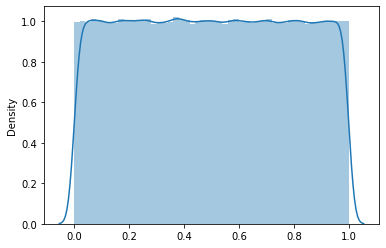

In [19]:
sns.distplot(np.random.rand(1000000))
plt.show()

### randn
정규 분포를 따르는 랜덤
평균이 0이고 표준편차가 1
인자로 shape를 받는다.

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


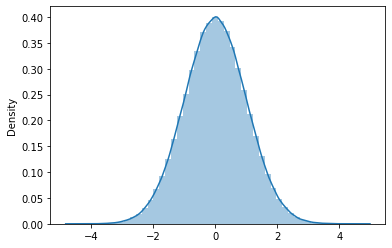

In [20]:
sns.distplot(np.random.randn(1000000))
plt.show()

### normal
세세하게 정규 분포를 조절할 수 있다.

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


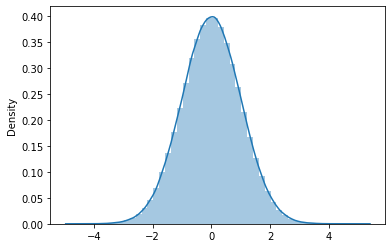

In [21]:
sns.distplot(np.random.normal(size=1000000))
plt.show()

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


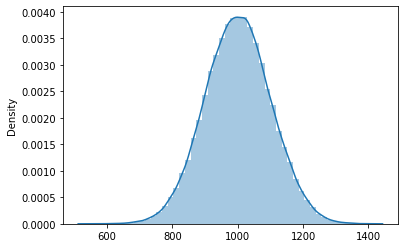

In [22]:
sns.distplot(np.random.normal(1000, 100, 100000))
plt.show()